In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train_df = pd.read_csv('data/train.csv.zip')
test_df = pd.read_csv('data/test.csv.zip')

In [8]:
train_df.head(10)

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost
5,7,0.405680,0.253277,0.441420,0.280324,green,Goblin
6,8,0.399331,0.568952,0.618391,0.467901,white,Goblin
7,11,0.516224,0.536429,0.612776,0.468048,clear,Ghoul
8,12,0.314295,0.671280,0.417267,0.227548,blue,Ghost
9,19,0.280942,0.701457,0.179633,0.141183,white,Ghost


bone_length                                                    \
             count      mean       std       min       25%       50%   
type                                                                   
Ghost        117.0  0.347466  0.117748  0.061032  0.269748  0.340442   
Ghoul        129.0  0.517159  0.120600  0.200753  0.439625  0.515397   
Goblin       125.0  0.429650  0.101917  0.208625  0.355313  0.430797   

                            
             75%       max  
type                        
Ghost   0.417253  0.622371  
Ghoul   0.590384  0.817001  
Goblin  0.492438  0.678519

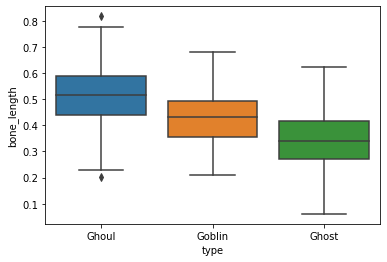

In [9]:
sns.boxplot(data = train_df , x = 'type', y = "bone_length")
train_df[['type','bone_length']].groupby('type').describe()


rotting_flesh                                                    \
               count      mean       std       min       25%       50%   
type                                                                     
Ghost          117.0  0.593759  0.142150  0.165539  0.504399  0.603780   
Ghoul          129.0  0.490515  0.115357  0.172182  0.417474  0.491497   
Goblin         125.0  0.442357  0.140284  0.095687  0.341187  0.457490   

                            
             75%       max  
type                        
Ghost   0.682687  0.932466  
Ghoul   0.561786  0.779153  
Goblin  0.530852  0.840049

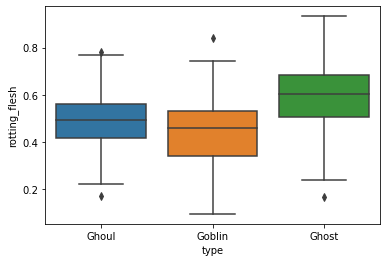

In [10]:
sns.boxplot(data = train_df , x = 'type', y = "rotting_flesh")
train_df[['type','rotting_flesh']].groupby('type').describe()


hair_length                                                    \
             count      mean       std       min       25%       50%   
type                                                                   
Ghost        117.0  0.373186  0.117642  0.134600  0.299507  0.365142   
Ghoul        129.0  0.655550  0.138127  0.287008  0.556691  0.667384   
Goblin       125.0  0.544581  0.116964  0.239212  0.474255  0.558776   

                            
             75%       max  
type                        
Ghost   0.461068  0.636340  
Ghoul   0.751614  1.000000  
Goblin  0.621787  0.840013

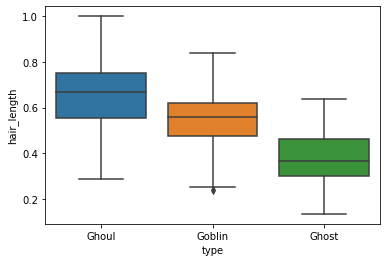

In [11]:
sns.boxplot(data = train_df , x = 'type', y = "hair_length")
train_df[['type','hair_length']].groupby('type').describe()


has_soul                                                              \
          count      mean       std       min       25%       50%       75%   
type                                                                          
Ghost     117.0  0.320023  0.139790  0.009402  0.230361  0.307534  0.415930   
Ghoul     129.0  0.601634  0.134813  0.280854  0.501544  0.600393  0.698480   
Goblin    125.0  0.478663  0.127293  0.194413  0.377121  0.466024  0.557136   

                  
             max  
type              
Ghost   0.689980  
Ghoul   0.935721  
Goblin  0.854949

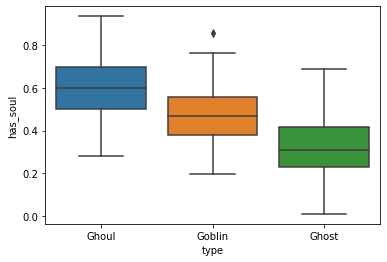

In [12]:
sns.boxplot(data = train_df , x = 'type', y = "has_soul")
train_df[['type','has_soul']].groupby('type').describe()


In [13]:
colors  = pd.get_dummies(train_df.color, prefix= 'color')
train_df[list(colors.columns)] = colors
train_df = train_df.drop(["color"], axis = 1)
to_standartize = train_df[["bone_length","rotting_flesh" , "hair_length", "has_soul"]]


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
standartized = scaler.fit_transform(to_standartize)
train_df[["bone_length","rotting_flesh" , "hair_length", "has_soul"]] = standartized

<AxesSubplot:xlabel='type', ylabel='has_soul'>

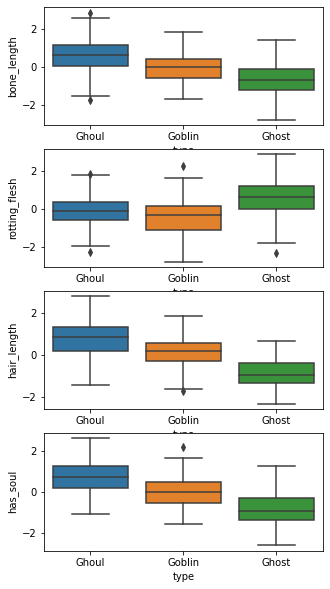

In [16]:
fig, axes = plt.subplots(4, 1, figsize=(5,10))
sns.boxplot(data = train_df , x = 'type', y = "bone_length", ax = axes[0])
sns.boxplot(data = train_df , x = 'type', y = "rotting_flesh", ax = axes[1])
sns.boxplot(data = train_df , x = 'type', y = "hair_length", ax = axes[2])
sns.boxplot(data = train_df , x = 'type', y = "has_soul", ax = axes[3])


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

y = train_df["type"]
y[y== "Ghoul"] = 0
y[y== "Ghost"] = 1
y[y=="Goblin"] = 2 
y = y.astype(int)

train_df = train_df.drop('id', axis= 1)
train_df = train_df.drop('type', axis= 1)
X = train_df.values

x_train, x_test, y_train, y_test = train_test_split(X , y,test_size = 0.3, random_state=13)

<ipython-input-17-8c52c4137220>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y== "Ghoul"] = 0
<ipython-input-17-8c52c4137220>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y== "Ghost"] = 1
<ipython-input-17-8c52c4137220>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=="Goblin"] = 2


In [28]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV



CATboost = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)
CATboost.fit(x_train, y_train,eval_set = (x_test,y_test ) , plot= True)
#predictions = CATboost.predict(x_test)
#print(classification_report(y_test, predictions))
#cross_val_score(CATboost, x_train, y_train, cv=10).mean()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8771062	test: 0.8927368	best: 0.8927368 (0)	total: 3.83ms	remaining: 187ms
1:	learn: 0.7423730	test: 0.7855245	best: 0.7855245 (1)	total: 10.3ms	remaining: 247ms
2:	learn: 0.6655961	test: 0.7235656	best: 0.7235656 (2)	total: 16.6ms	remaining: 260ms
3:	learn: 0.6101273	test: 0.6952965	best: 0.6952965 (3)	total: 19.2ms	remaining: 221ms
4:	learn: 0.5472436	test: 0.6707002	best: 0.6707002 (4)	total: 27.6ms	remaining: 249ms
5:	learn: 0.5180644	test: 0.6536430	best: 0.6536430 (5)	total: 32ms	remaining: 235ms
6:	learn: 0.4926745	test: 0.6525851	best: 0.6525851 (6)	total: 36.9ms	remaining: 226ms
7:	learn: 0.4725600	test: 0.6506235	best: 0.6506235 (7)	total: 43.3ms	remaining: 228ms
8:	learn: 0.4524438	test: 0.6425812	best: 0.6425812 (8)	total: 46ms	remaining: 209ms
9:	learn: 0.4320864	test: 0.6439090	best: 0.6425812 (8)	total: 49.2ms	remaining: 197ms
10:	learn: 0.4156636	test: 0.6419426	best: 0.6419426 (10)	total: 57.8ms	remaining: 205ms
11:	learn: 0.3913561	test: 0.6298163	best: 0.

In [19]:
test_df
colors  = pd.get_dummies(test_df.color, prefix= 'color')
test_df[list(colors.columns)] = colors
test_df = test_df.drop(["color"], axis = 1)
to_standartize = test_df[["bone_length","rotting_flesh" , "hair_length", "has_soul"]]
standartized = scaler.fit_transform(to_standartize)
test_df[["bone_length","rotting_flesh" , "hair_length", "has_soul"]] = standartized


надо подточить модельку 

In [20]:
test_df = test_df.drop('id', axis= 1).values


In [21]:
res = CATboost.predict(test_df)

In [22]:
res = res.astype('str')

In [23]:
res[res == "0"] = "Ghoul"
res[res == "1"] = "Ghost"
res[res == "2"] = "Goblin"


In [24]:
result = pd.read_csv('data/sample_submission.csv.zip')

In [25]:
result['type'] = res

In [26]:
result.to_csv("data/sample_submission.csv", index = False)

In [27]:
result

,id,type
0,3,Ghoul
1,6,Goblin
2,9,Ghoul
3,10,Ghost
4,13,Ghost
...,...,...
524,893,Goblin
525,894,Ghost
526,895,Ghoul
527,898,Ghost
